
# Deep Learning for Image Classification Exercise



------------

## The Challenge

**The task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

## The Data

**Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**Using matplotlib to view an image from the data set. It can be any image from the data set.**

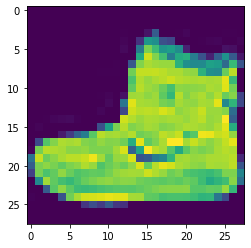

In [3]:
some_img= x_train[0]

plt.imshow(some_img)

## Preprocessing the Data

**Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [58]:
x_train.max()

1.0

In [5]:
x_train, x_test = x_train/255, x_test/255

In [6]:
x_train[77].max()

1.0

**Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [7]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [9]:
x_test = x_test.reshape(10000, 28, 28, 1)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10, dtype ="uint8")
y_test = to_categorical(y_test, 10, dtype ="uint8")

In [11]:
y_train[42]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

## Building the Model

**Using Keras to create a model consisting of the following layers (this can/should be played arround with):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
stop = EarlyStopping(monitor='val_loss', patience=1)

In [36]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'], callbacks=[stop])

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 32)          16416     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

### Training the Model
**Train/Fit the model to the x_train set. Amount of epochs can be changed.**

In [38]:
model.fit(
    x=x_train,
    y=y_train,
    batch_size=None,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.5110 - accuracy: 0.8145 - val_loss: 0.3905 - val_accuracy: 0.8576
Epoch 2/10
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.3465 - accuracy: 0.8731 - val_loss: 0.3753 - val_accuracy: 0.8590
Epoch 3/10
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.3008 - accuracy: 0.8889 - val_loss: 0.3394 - val_accuracy: 0.8809
Epoch 4/10
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.2722 - accuracy: 0.8997 - val_loss: 0.3264 - val_accuracy: 0.8796
Epoch 5/10
60000/60000 [==============================] - 90s 2ms/sample - loss: 0.2506 - accuracy: 0.9067 - val_loss: 0.2935 - val_accuracy: 0.8918
Epoch 6/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.2289 - accuracy: 0.9140 - val_loss: 0.2864 - val_accuracy: 0.8934
Epoch 7/10
60000/60000 [==============================] 

### Evaluating the Model

**The accuracy,precision,recall,f1-score the model achieved on the x_test data set**

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
results = model.history.history

In [42]:
results = pd.DataFrame(results)

In [44]:
results

,loss,accuracy,val_loss,val_accuracy
0,0.510982,0.814467,0.390509,0.8576
1,0.346532,0.873083,0.375263,0.8590
2,0.300765,0.888883,0.339366,0.8809
3,0.272197,0.899700,0.326372,0.8796
4,0.250615,0.906650,0.293484,0.8918
5,0.228946,0.913967,0.286431,0.8934
6,0.211842,0.919767,0.306242,0.8908
7,0.194867,0.926767,0.289409,0.8969
8,0.182676,0.931067,0.272709,0.9058
9,0.169902,0.935083,0.280197,0.9078


In [45]:
results.iloc[9]

loss            0.169902
accuracy        0.935083
val_loss        0.280197
val_accuracy    0.907800
Name: 9, dtype: float64

In [46]:
results.to_csv('results.csv')

In [47]:
results = pd.DataFrame(pd.read_csv('results.csv'))

(<matplotlib.axes._subplots.AxesSubplot at 0xd7fbed3948>,
 <matplotlib.axes._subplots.AxesSubplot at 0xd7fb6faac8>)

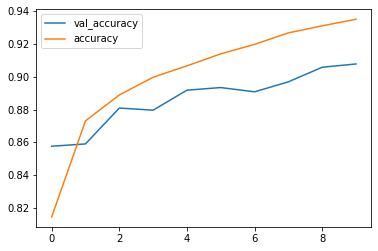

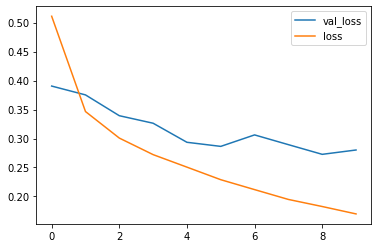

In [48]:
results[['val_accuracy', 'accuracy']].plot(), results[['val_loss', 'loss']].plot()

In [51]:
from sklearn.metrics import classification_report
y_pred = model.predict_classes(x_test)

In [52]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [53]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [54]:
y_test_ = np.argmax(y_test, axis=1)

In [55]:
y_test_

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [57]:
print(classification_report(y_pred, y_test_))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1089
           1       0.98      0.99      0.98       993
           2       0.87      0.86      0.87      1014
           3       0.93      0.90      0.91      1033
           4       0.82      0.87      0.85       948
           5       0.98      0.98      0.98      1000
           6       0.70      0.75      0.72       924
           7       0.98      0.95      0.97      1026
           8       0.98      0.97      0.97      1004
           9       0.95      0.98      0.97       969

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

